# Data Analytics Project: Spurious Correlations

> <strong>Sotiris Baratsas</strong> <br />
> MSc in Business Analytics<br />


## Per Capita Cheese Consumption and Deaths by Accidential Suffocation and Strangulation in Bed

Show that, in the U.S., the per capita cheese consumption is correlated with the number of deaths by accidental suffocation and strangulation in bed. You must provide a figure, showing the situation, and the statistical results you find.


We start our analysis, by importing some libraries we are going to use.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

##### Reading the Cheese consumption dataset

* We start by reading the cheese consumption dataset, using the `read_excel()` function of pandas.
* We use the argument `skiprows=10`, in order to skip the introductory rows that do not provide numerical data.
* We use the argument `index_col=0`, in order to set the "Years" column as the index.
* We use the `.dropna(thresh=1)` to get rid of the columns that have at least one Na or NaN value. That gets rid of the "Notes" in the footer of the dataset and leaves us only with the values we want.
* Then, we set the data type for the index (Years) to "integer".
* Finally, we use the `.iloc` function, in order to keep only the columns we want (the 3 cheese columns), and rename them.

In [0]:
cheese = pd.read_excel("pcconsp_1_.xlsx", skiprows=10, index_col=0).dropna(thresh=1)
cheese.index = cheese.index.astype(int)
cheese = cheese.iloc[:, 3:6].rename(columns={"Unnamed: 4": "american_cheese",
                                             "Unnamed: 5": "other_cheese", 
                                             "Unnamed: 6": "cottage_cheese"})

In [0]:
print(cheese.shape) # Dimensions of our dataset
cheese.head(5)

(43, 3)


,american_cheese,other_cheese,cottage_cheese
1975,8.147222,6.126409,4.588537
1976,8.883106,6.627872,4.632284
1977,9.213005,6.781846,4.617711
1978,9.525359,7.309603,4.600490
1979,9.597205,7.567657,4.434472


##### Reading the Causes of Death dataset

* We start by reading the Causes of Death dataset, using the `read_csv()` function of pandas.
* We use the argument `sep='\t'`, in order to clarity that we have tab-separated values.
* We use the argument `index_col="Year"`, in order to set the "Years" column as the index.
* We use the argument `header=(0)`, in order to set the first line as the header.
* We use the `.dropna(thresh=2)` to get rid of the columns that have at least 2 Na or NaN value. That gets rid of the "Notes" in the footer of the dataset and leaves us only with the values we want.
* We use the `["Deaths]` attribute, in order to only keep the `["Deaths]` column from the dataset
* Then, we set the data type for the index (Years) to "integer".

In [0]:
deaths = pd.read_csv("causes.txt",sep='\t',index_col="Year", header=(0)).dropna(thresh=2)["Deaths"]
deaths.index = deaths.index.astype(int)
deaths.head(5)

Year
1999    330.0
2000    327.0
2001    456.0
2002    509.0
2003    497.0
Name: Deaths, dtype: float64

##### Keeping the same rows (Years) for both dataset

We observe, that for the Cheese Consumption dataset we have available data for more years than the Causes of Death dataset. However, if we want to compare the 2 datasets, we must only keep the years they have in common.

In [0]:
cheese = cheese.loc[cheese.index.isin(deaths.index)] #keeping only the years for which we have data for both variables

##### Sum of Cheese Consumption

Finally, we create a new Series, that has - for each year - the sum of cheese consumption, based on the 3 categories (american cheese, other cheese, cottage cheese).

In [0]:
total_cheese = (cheese["american_cheese"] + cheese["other_cheese"] + cheese["cottage_cheese"]).rename(columns={"0": "american_cheese",
                                             "Unnamed: 5": "other_cheese", 
                                             "Unnamed: 6": "cottage_cheese"})

##### Testing for Normality

Before calculating the correlation between the 2 variables, we need to check if we can assume a normal distribution, using the `normaltest()` function from the `scipy.stats` library.
* If the normality assumption holds for both dataset, we can use the Pearson R metric for the correlation between the 2 variables.
* If the normality assumption does not hold, we need to use the non-parametric Spearman R metric for the correlation.

In [0]:
stats.normaltest(total_cheese)

/Users/sotirisbaratsas/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=0.8639127408732421, pvalue=0.6492377020247003)

Testing for Normality on the cheese consumption dataset, we observe a p-value = 0.65, which is far larger than our 0.05 sifnificance level. Therefore, we accept that our variable is normally distributed. 

In [0]:
stats.normaltest(deaths)

/Users/sotirisbaratsas/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=0.7486999756575355, pvalue=0.6877361704141061)

Testing for Normality on the Causes of Death dataset, we observe a p-value = 0.69, which is far larger than our 0.05 sifnificance level. Therefore, we accept that our variable is normally distributed. 

In [0]:
stats.pearsonr(total_cheese, deaths)

(0.9402610717856561, 2.2342487301301587e-09)

#### Calculating the Correlation

Since both our variables are normally distributed, we can use the Pearson R metric to calculate the correlation between our 2 variables. Using, the `pearsonr()` function from `scipy.stats`, we calculate a Pearson R value = 0.94, which shows a very strong correlation between Per Capita Cheese Consumption and Deaths by Accidential Suffocation and Strangulation in Bed. Also, the p-value for testing non-correlation is very small, meaning we reject the hypothesis that our variables are <strong>not</strong> correlated.

Finally, we can create a plot, to visualize the correlation between our 2 variables.

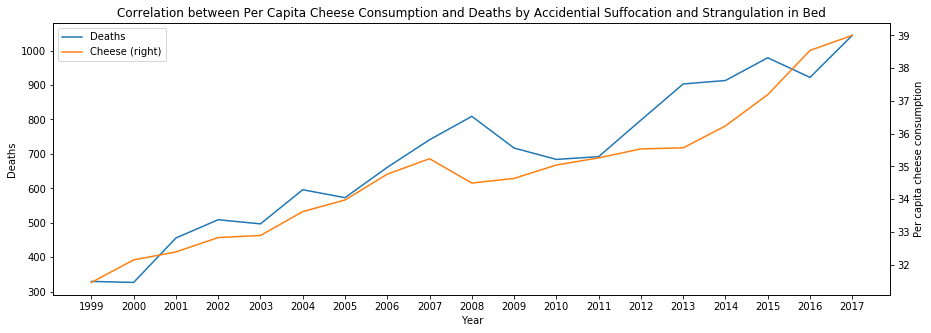

In [0]:
deaths.plot(label="Deaths", legend=True, figsize=(15, 5), xticks=deaths.index, 
            title="Correlation between Per Capita Cheese Consumption and Deaths by Accidential Suffocation and Strangulation in Bed")
plt.ylabel('Deaths')
total_cheese.plot(secondary_y=True, label="Cheese", legend=True, figsize=(15, 5), xticks=total_cheese.index)
plt.ylabel('Per capita cheese consumption')
plt.show()

## Doctorates and Mozarella

Show that, in the U.S., the number of doctorates awarded in Biological and Biomedical Sciences is correlated with the per capita consumption of mozarella cheese. You must provide a figure, showing the situation, and the statistical results you find.

##### Reading the Doctorates dataset

* We start by reading the Doctorates dataset, using the `read_csv()` function of pandas.
* We set `','` as the separator, since we have comma-separated values.
* We notice that the numeric values are shown as string with a comma indicating the thousands. That's why we use the argument `thousand=','` to indicate that.
* We use the argument `skiprows=7`, in order to skip the introductory rows that do not provide numerical data.
* We use the argument `index_col=0`, in order to set the "Years" column as the index.
* We use the argument `usecols=[1]`, in order to keep only the column that shows the number of doctorates awarded.
* We use the `.dropna(thresh=1)` function to get rid of the columns that have at least one Na or NaN value. That gets rid of the "Notes" in the footer of the dataset and leaves us only with the values we want.
* Then, we set the data type for the index (Years), as well as the number of doctorates to "integer".
* Finally, we rename the column that shows the number of doctorates and sort the series according to the index.

In [0]:
doctorates = pd.read_csv("doctorates.csv", sep=",", thousands=",", index_col=0, skiprows=7, usecols=[1]).dropna(thresh=1)
doctorates.index = doctorates.index.astype(int)
doctorates = doctorates.rename(columns={"Unnamed: 1": "Doctorates"}).sort_index()
doctorates["Doctorates"] = doctorates["Doctorates"].astype(int)
doctorates.head(5)

,Doctorates
1958,1201
1959,1140
1960,1246
1961,1244
1962,1397


##### Reading the Mozarella dataset

* We start by reading the Mozarella dataset, using the `read_excel()` function of pandas.
* The peculiarity of this dataset, is that the values for the years since 1995 are in one data sheet, while the values from 1970 to 1994 are located in a different data sheet. For this reason, when we read the data, apart from the filename, we will define from which data sheet we want to read from.
* We use the argument `skiprows=2`, in order to skip the introductory rows that do not provide numerical data.
* We use the argument `index_col=0`, in order to set the "Years" column as the index.
* We use the argument `usecols=[0,4]`, in order to keep only the columns that shows the years and the consumption of mozarella.
* We use the `.dropna(thresh=1)` function to get rid of the columns that have at least one Na or NaN value. That gets rid of the "Notes" in the footer of the dataset and leaves us only with the values we want.
* Then, we set the data type for the index (Years) to "integer".

In [0]:
mozarella1 = pd.read_excel("cheese_per_cap.xlsx",
                           "Cheese per cap since '95", # name of data sheet
                           skiprows=2, usecols=[0,4], 
                           index_col=0).dropna(thresh=1)
mozarella1.index = mozarella1.index.astype(int)
mozarella1.head(5)

,Mozzarella
1995,7.894546
1996,8.220176
1997,8.164868
1998,8.326136
1999,8.737508


We perform the same operations for the other part of the data set, that show the data from 1970 to 1994.

In [0]:
mozarella2 = pd.read_excel("cheese_per_cap.xlsx", 
                           "Cheese per cap '70-'94", 
                           skiprows=3, usecols=[0,7], 
                           index_col=0).dropna(thresh=1).head(25)
mozarella2 = mozarella2.rename(columns={"Unnamed: 1": "Mozzarella"})
mozarella2.index = mozarella2.index.astype(int)
mozarella2.tail(5)

,Mozzarella
1990,6.88032
1991,7.15183
1992,7.62614
1993,7.41562
1994,7.75714


Then, we concatenate the 2 data Series into one Series and sort it, using the index (Years). <br />
Now, our new Series `mozarella`, containts all the data from 1970 to 2017.

In [0]:
mozarella = pd.concat([mozarella1, mozarella2], axis=0).sort_index()
mozarella.head(5)

,Mozzarella
1970,1.18764
1971,1.37951
1972,1.57094
1973,1.76314
1974,1.85777


In [0]:
mozarella.tail(5)

,Mozzarella
2013,10.7318
2014,11.1656
2015,11.2681
2016,11.7252
2017,11.57


##### Keeping the same rows (Years) for both dataset

We observe, that for the Doctorates dataset we have available data for more years than the Mozarella dataset. However, if we want to compare the 2 datasets, we must only keep the years they have in common.

In [0]:
doctorates = doctorates.loc[doctorates.index.isin(mozarella.index)] 
#keeping only the years for which we have data for both variables
doctorates.head()

,Doctorates
1970,3361
1971,3654
1972,3600
1973,3648
1974,3484


##### Testing for Normality

Before calculating the correlation between the 2 variables, we need to check if we can assume a normal distribution, using the `normaltest()` function from the `scipy.stats` library.
* If the normality assumption holds for both dataset, we can use the Pearson R metric for the correlation between the 2 variables.
* If the normality assumption does not hold, we need to use the non-parametric Spearman R metric for the correlation.

In [0]:
stats.normaltest(doctorates["Doctorates"])

NormaltestResult(statistic=8.025644594718873, pvalue=0.018082289554945043)

Testing for Normality on the Doctorates dataset, we observe a p-value = 0.02, which is lower than our 0.05 sifnificance level. Therefore, we reject the hypothesis that our variable is normally distributed. 

In [0]:
stats.normaltest(mozarella["Mozzarella"])

NormaltestResult(statistic=24.110617238398063, pvalue=5.813611269354502e-06)

In the same way, testing for Normality on the Mozarella dataset, we observe a p-value = 5.8e-06, which is far lower than our 0.05 sifnificance level. Therefore, we reject the hypothesis that our variable is normally distributed. 

We can confirm that our variables are not normally distributes, using a QQplot

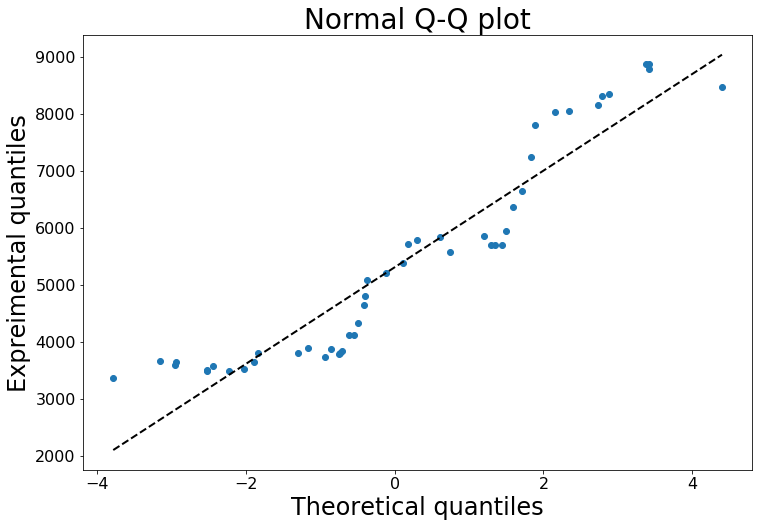

In [0]:
import numpy.random as random

norm=random.normal(0,2,len(doctorates["Doctorates"]))
norm.sort()
plt.figure(figsize=(12,8),facecolor='1.0') 

plt.plot(norm,doctorates["Doctorates"],"o")

#generate a trend line as in http://widu.tumblr.com/post/43624347354/matplotlib-trendline
z = np.polyfit(norm,doctorates["Doctorates"], 1)
p = np.poly1d(z)
plt.plot(norm,p(norm),"k--", linewidth=2)
plt.title("Normal Q-Q plot", size=28)
plt.xlabel("Theoretical quantiles", size=24)
plt.ylabel("Expreimental quantiles", size=24)
plt.tick_params(labelsize=16)
plt.show()

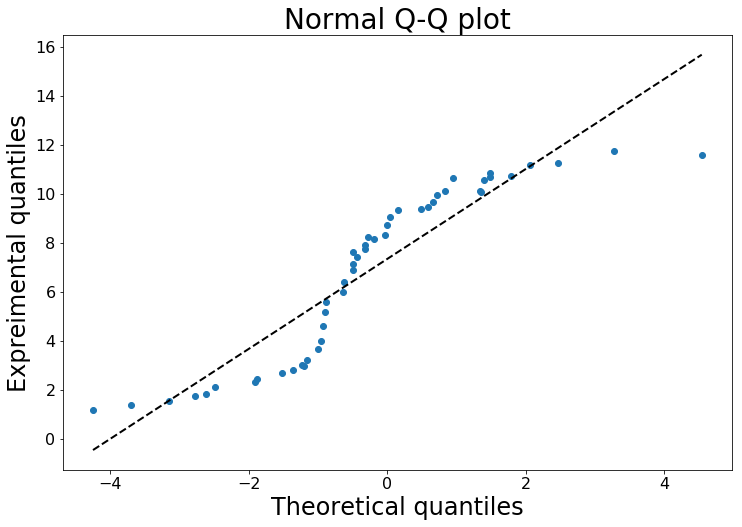

In [0]:
norm=random.normal(0,2,len(mozarella["Mozzarella"]))
norm.sort()
plt.figure(figsize=(12,8),facecolor='1.0') 

plt.plot(norm,mozarella["Mozzarella"],"o")

#generate a trend line as in http://widu.tumblr.com/post/43624347354/matplotlib-trendline
z = np.polyfit(norm,mozarella["Mozzarella"], 1)
p = np.poly1d(z)
plt.plot(norm,p(norm),"k--", linewidth=2)
plt.title("Normal Q-Q plot", size=28)
plt.xlabel("Theoretical quantiles", size=24)
plt.ylabel("Expreimental quantiles", size=24)
plt.tick_params(labelsize=16)
plt.show()

#### Calculating the Correlation

Since neither of our variables is normally distributed, we can not use the Pearson R metric to calculate the correlation between our 2 variables. We have to use the non-paremetric Spearman R metric.<br />

Using, the `spearmanr()` function from `scipy.stats`, we calculate a Spearman R value = 0.98, which shows a very strong correlation between Per Capita Mozarella Consumption and the Number of Doctorates awarded in Biological and Biomedical sciences. Also, the p-value for testing non-correlation is very small, meaning we reject the hypothesis that our variables are <strong>not</strong> correlated.

In [0]:
stats.spearmanr(doctorates, mozarella)

SpearmanrResult(correlation=0.9783422909706453, pvalue=4.086268755539459e-33)

#### Visualizing the Correlation

We can also visualize the correlation between our 2 variables, using a plot

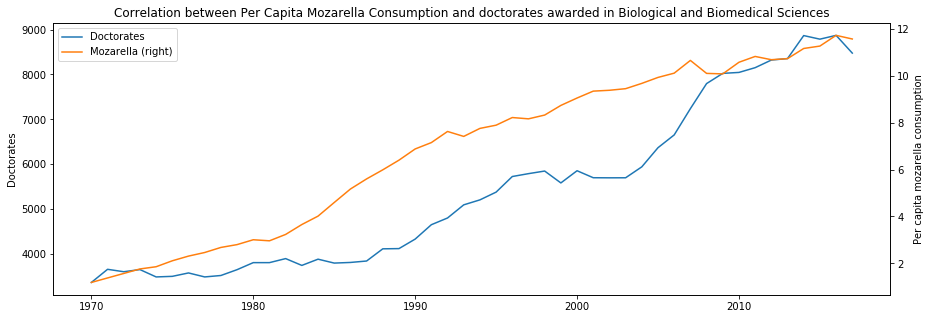

In [0]:
doctorates["Doctorates"].plot(label="Doctorates", legend=True, figsize=(15, 5),
                title="Correlation between Per Capita Mozarella Consumption and doctorates awarded in Biological and Biomedical Sciences")
plt.ylabel('Doctorates')
mozarella["Mozzarella"].plot(secondary_y=True, label="Mozarella", legend=True, figsize=(15, 5))
plt.ylabel('Per capita mozarella consumption')
plt.show()